#### **Phase I**

#### 1. Problem & Target

#### Context
* This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to 
* diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints 
* were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima 
* Indian heritage.

#### Content
* The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of 
* pregnancies the patient has had, their BMI, insulin level, age, and so on.

#### Inspiration
* Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

#### columns definition
* Pregnancies: Number of times pregnant
* Glucose(葡萄糖): Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin(胰島素): 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age
* Outcome Class variable (0 or 1) 268 of 768 are 1, the others are 0

#### 2. dataset

In [1]:
## load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import missingno as msno
from my_template import tot_exec_time, added_section_separate_line
from my_template import describe_skew_unvariate_distribution, describe_class_distribution
from my_template import visualize_features_hist, visualize_density_plot, visualize_box_whisker_plot, visualize_correlation_matrix
from my_template import detect_column_only_single_value, detect_column_very_few_value, detect_outlier_over3std, detect_outlier_quartile, detect_have_null_value, detect_zero_value_counts
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
## load dataset
data_url = "./dataset/pima-indians-diabetes.csv"
df = pd.read_csv(data_url, header=None)
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
## summarize data
print(f"dataset head: \n{df.head()}")
added_section_separate_line()
print(f"dataset shape: {df.shape}")
added_section_separate_line()
pd.set_option('precision', 1)
print(f"dataset description: \n{df.describe()}")
added_section_separate_line()
print("feaures skew:")
describe_skew_unvariate_distribution(df, df.columns)
added_section_separate_line()
print("target class distribution:")
describe_class_distribution(df, 'Outcome')

dataset head: 
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
------------------------------
dataset shape: (768, 9)
------------------------------
dataset description: 
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
count        768.0    768.0          768.0          768.0    768.0  768.0   
mean           3.8    120.

Outcome
0    500
1    268
dtype: int64

Histogram of features:


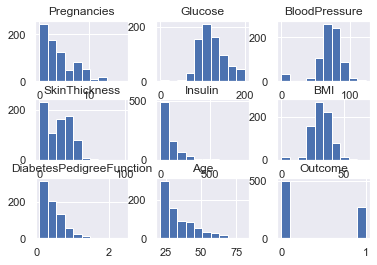

------------------------------
Density Plots of features:


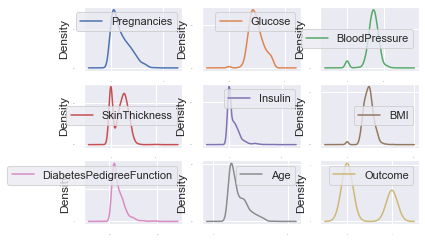

------------------------------
Box-whisker Plots of features:


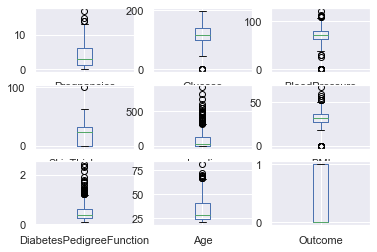

Correlation matrix of features:


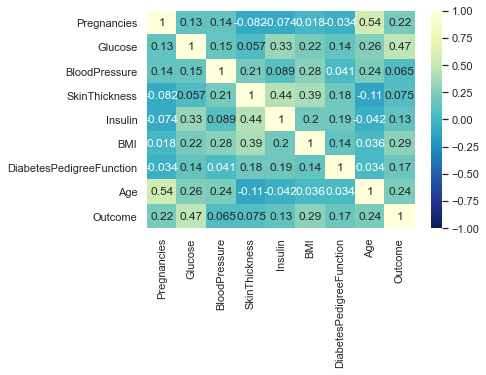

In [6]:
## data visualization
sns.set_theme(style="darkgrid")
visualize_features_hist(df, df.columns)
added_section_separate_line()
visualize_density_plot(df, df.columns, layout=(3,3))
added_section_separate_line()
visualize_box_whisker_plot(df, df.columns, layout=(3,3))
visualize_correlation_matrix(df, df.columns)

Missing value viz (black & white light):


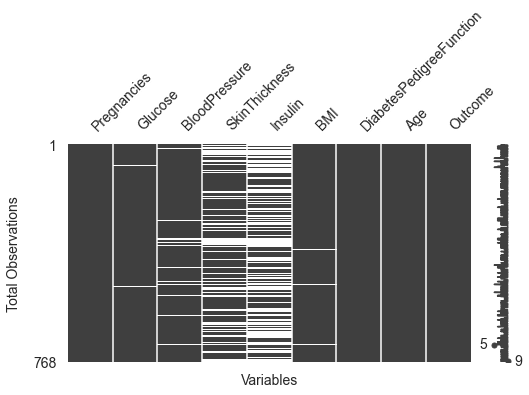

------------------------------
Missing value viz (correlation between missing):


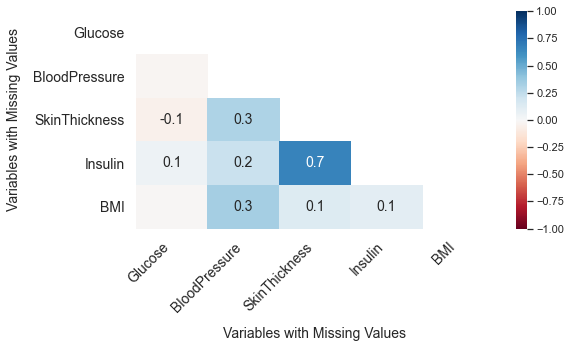

In [14]:
## data visualization - missing value
print("Missing value viz (black & white light):")
df_na = df.copy(deep=True)
feature_check_zero_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_na[feature_check_zero_list] = df_na[feature_check_zero_list].replace(0, np.nan)
fig = msno.matrix(df_na, figsize=(8,4))
plt.xlabel('Variables', size=14, labelpad=12)
plt.ylabel('Total Observations', size=14, labelpad=12)
plt.tick_params(axis='both', labelsize=14, length=8)
plt.show()
added_section_separate_line()
print("Missing value viz (correlation between missing):")
fig = msno.heatmap(df_na, figsize=(8,4))
plt.xlabel('Variables with Missing Values', size=14, labelpad=12)
plt.ylabel('Variables with Missing Values', size=14, labelpad=12)
plt.tick_params(axis='both', labelsize=14, length=8)
plt.show()

* 小結：
    * 觀察feature: Pregnancies、SkinThickness、Insulin、DiabetesPedigreeFunction與Age都有右偏的情況
    * 觀察原始資料中，Glucose與Insulin、Age還有Outcome有正相關；Pregnancies與Age有正相關(需觀察Age的範圍有哪些)；SkinThickness與Insulin、BMI有正相關。因為資料尚未處理，故尚不考慮其是否有不合理性

#### **Phase II**

#### 3. data preprocessing

In [10]:
## data cleaning - data detection to remove
for idx, name in enumerate(df.columns):
    print(f"feature {idx}: {name}")
added_section_separate_line()
detect_column_only_single_value(df)
added_section_separate_line()
detect_column_very_few_value(df)
added_section_separate_line()
detect_have_null_value(df)
added_section_separate_line()
for col in df.columns[:-1]:
    print(f"Feature ({col}):", end=" ")
    detect_outlier_over3std(df, col)
added_section_separate_line()
for col in df.columns[:-1]:
    print(f"Feature ({col}):", end=" ")
    detect_outlier_quartile(df, col)

feature 0: Pregnancies
feature 1: Glucose
feature 2: BloodPressure
feature 3: SkinThickness
feature 4: Insulin
feature 5: BMI
feature 6: DiabetesPedigreeFunction
feature 7: Age
feature 8: Outcome
------------------------------
Record columns to delete (only single value): []
------------------------------
Record columns to delete (very few value): [8]
------------------------------
There is no null value in dataframe.
------------------------------
Feature (Pregnancies): Identified outliers: 4, Non-outlier observation: 768
Feature (Glucose): Identified outliers: 5, Non-outlier observation: 768
Feature (BloodPressure): Identified outliers: 35, Non-outlier observation: 768
Feature (SkinThickness): Identified outliers: 1, Non-outlier observation: 768
Feature (Insulin): Identified outliers: 18, Non-outlier observation: 768
Feature (BMI): Identified outliers: 14, Non-outlier observation: 768
Feature (DiabetesPedigreeFunction): Identified outliers: 11, Non-outlier observation: 768
Feature (A

* 小結：
    * 在Record columns to delete中，feature 8為Outcome，故不刪除
    * 雖然檢測null value並無發現空值，但實際上再往上確認data description時，發現共有6個(不含target)的最小值為0，除了Pregnancies以外，在Glucose、BloodPressure、SkinThickness、Insulin與BMI的features特性實際上不應該出現0，故推測是當時未量測到數值而填入0，故認定其為空值

In [11]:
## data cleaning - data remove 0(null) values
feature_check_zero_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
detect_zero_value_counts(df, feature_check_zero_list)
added_section_separate_line()
print(f"Dataframe shape before drop 0 values: {df.shape}")
df_rm0 = df.copy(deep=True)
for feature in feature_check_zero_list:
    idx_names = df_rm0[df_rm0[feature]==0].index
    df_rm0 = df_rm0.drop(idx_names)
    df_rm0 = df_rm0.reset_index(drop=True)
print(f"Dataframe shape after drop 0 values: {df_rm0.shape}")
print(f"Data ratio after drop: {100*df_rm0.shape[0]/df.shape[0]:.2f}%")

Detect 0 value in these features:
> Count of zeros in Column Glucose: 5
> Count of zeros in Column BloodPressure: 35
> Count of zeros in Column SkinThickness: 227
> Count of zeros in Column Insulin: 374
> Count of zeros in Column BMI: 11
------------------------------
Dataframe shape before drop 0 values: (768, 9)
Dataframe shape after drop 0 values: (392, 9)
Data ratio after drop: 51.04%


Correlation matrix of features:


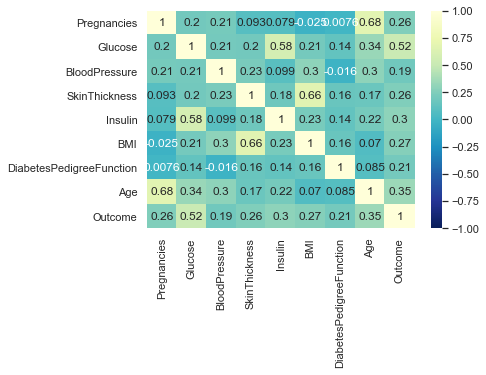

In [7]:
sns.set_theme(style="darkgrid")
visualize_correlation_matrix(df_rm0, df_rm0.columns)

* 小結：
    * 觀察刪除空值後的data correlation，Glucose與Insulin及Outcome有正相關性；Pregnancies與Age有正相關性；BMI與SkinThickness有正相關性
    * 其中與目標(Outcome)有正相關性的feature為Glucose，可考慮僅用此feature做baseline model驗證

#### 4. model & validation

In [20]:
seed = 87
scoring = "accuracy"   # 使用accuracy評估model

In [21]:
data = df_rm0.values
X = data[:, :-1]
y = data[:, -1]
validation_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)
print(f"Input: {X_train.shape}")
print(X_train[:5, :])
print(f"Output: {y_train.shape}")
print(y_train[:5])

Input: (262, 8)
[[3.000e+00 1.730e+02 8.200e+01 4.800e+01 4.650e+02 3.840e+01 2.137e+00
  2.500e+01]
 [1.200e+01 1.510e+02 7.000e+01 4.000e+01 2.710e+02 4.180e+01 7.420e-01
  3.800e+01]
 [6.000e+00 1.030e+02 7.200e+01 3.200e+01 1.900e+02 3.770e+01 3.240e-01
  5.500e+01]
 [1.000e+00 1.120e+02 8.000e+01 4.500e+01 1.320e+02 3.480e+01 2.170e-01
  2.400e+01]
 [1.000e+00 8.600e+01 6.600e+01 5.200e+01 6.500e+01 4.130e+01 9.170e-01
  2.900e+01]]
Output: (262,)
[1. 1. 0. 0. 0.]


In [22]:
# build model
models = dict()
models['LR'] = Pipeline(steps=[('m', LogisticRegression(solver='liblinear'))])
models['LDA'] = Pipeline(steps=[('m', LinearDiscriminantAnalysis())])
models['KNN'] = Pipeline(steps=[('m', KNeighborsClassifier())])
models['CART'] = Pipeline(steps=[('m', DecisionTreeClassifier())])
models['RF'] = Pipeline(steps=[('m', RandomForestClassifier())])
models['GBM'] = Pipeline(steps=[('m', GradientBoostingClassifier())])
models['NB'] = Pipeline(steps=[('m', GaussianNB())])
models['SVM'] = Pipeline(steps=[('m', SVC(gamma='auto'))])
# train model
results, names = list(), list()
for name, model in models.items():
    cv = KFold(n_splits=10, random_state=seed, shuffle=True)
    scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
    results.append(scores)
    names.append(name)
    print(f">{name} {np.mean(scores):.3f} ({np.std(scores):.3f})")

>LR 0.764 (0.066)
>LDA 0.809 (0.057)
>KNN 0.725 (0.066)
>CART 0.752 (0.056)
>RF 0.802 (0.074)
>GBM 0.797 (0.065)
>NB 0.763 (0.062)
>SVM 0.668 (0.099)


#### **Phase III**

#### 5. prediction

In [24]:
## 使用base-model進行預測
# 1. 以常理預測
print("# Method 1 for baseline model:")
output_values = df_rm0['Outcome'].values.tolist()
prediction = max(set(output_values), key=output_values.count)   # 找出比例最大的分類，直接作為所有驗證集的baseline預測結果
print(f"The most common value in target: {prediction}; and ratio of this feature in all dataset: {100*len(df_rm0[df_rm0['Outcome']==prediction])/len(df_rm0):.2f}%")
added_section_separate_line()
# 2. 以正相關性較高的feature(Glucose)進行預測
print("# Method 2 for baseline model:")
data = df_rm0.values
X = np.reshape(df_rm0['Glucose'].values, (len(df_rm0),-1))
y = df_rm0['Outcome'].values
validation_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f"> accuracy score: {100*accuracy_score(y_test, y_pred):.3f}%")
print(f"> confusion matric: \n{confusion_matrix(y_test, y_pred)}")
print(f"> classification report: \n{classification_report(y_test, y_pred)}")

# Method 1 for baseline model:
The most common value in target: 0; and ratio of this feature in all dataset: 66.84%
------------------------------
# Method 2 for baseline model:
> accuracy score: 75.385%
> confusion matric: 
[[80  7]
 [25 18]]
> classification report: 
              precision    recall  f1-score   support

           0       0.76      0.92      0.83        87
           1       0.72      0.42      0.53        43

    accuracy                           0.75       130
   macro avg       0.74      0.67      0.68       130
weighted avg       0.75      0.75      0.73       130



In [23]:
# 進行訓練與預測
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"> accuracy score: {100*accuracy_score(y_test, y_pred):.3f}%")
print(f"> confusion matric: \n{confusion_matrix(y_test, y_pred)}")
print(f"> classification report: \n{classification_report(y_test, y_pred)}")

> accuracy score: 76.923%
> confusion matric: 
[[75 12]
 [18 25]]
> classification report: 
              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83        87
         1.0       0.68      0.58      0.63        43

    accuracy                           0.77       130
   macro avg       0.74      0.72      0.73       130
weighted avg       0.76      0.77      0.76       130



* 小結：
    * 比較僅以Glucose對target做的baseline model，發現其accuracy=75.4%;隨意猜測的accuracy也有66.8%；而對於LDA進行預測的accuracy為76.9%，雖有進步但幅度不大(僅對預測target=1有進步)，需考量其它優化方式

### Experiment & Improvement 1: missing value treatment by using imputation

#### **Phase II**

In [3]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

In [4]:
seed = 87
scoring = "accuracy"   # 使用accuracy評估model

In [5]:
# simple imputation
df_impute = df.copy(deep=True)
feature_check_zero_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_impute[feature_check_zero_list] = df_impute[feature_check_zero_list].replace(0, np.nan)
data_impute = df_impute.values
X, y = data_impute[:, :-1], data_impute[:, -1]
validation_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)
# build
def temp_model():
    models = dict()
    models['LR'] = Pipeline(steps=[('i', SimpleImputer(missing_values=np.nan, strategy=s)), ('m', LogisticRegression(solver='liblinear'))])
    models['LDA'] = Pipeline(steps=[('i', SimpleImputer(missing_values=np.nan, strategy=s)), ('m', LinearDiscriminantAnalysis())])
    models['KNN'] = Pipeline(steps=[('i', SimpleImputer(missing_values=np.nan, strategy=s)), ('m', KNeighborsClassifier())])
    models['CART'] = Pipeline(steps=[('i', SimpleImputer(missing_values=np.nan, strategy=s)), ('m', DecisionTreeClassifier())])
    models['RF'] = Pipeline(steps=[('i', SimpleImputer(missing_values=np.nan, strategy=s)), ('m', RandomForestClassifier())])
    models['GBM'] = Pipeline(steps=[('i', SimpleImputer(missing_values=np.nan, strategy=s)), ('m', GradientBoostingClassifier())])
    models['NB'] = Pipeline(steps=[('i', SimpleImputer(missing_values=np.nan, strategy=s)), ('m', GaussianNB())])
    models['SVM'] = Pipeline(steps=[('i', SimpleImputer(missing_values=np.nan, strategy=s)), ('m', SVC(gamma='auto'))])
    return models
# train model
results, names = list(), list()
strategies = ['mean', 'median', 'most_frequent', 'constant']
for s in strategies:
    print(f"===> Strategy: {s} <===")
    models = temp_model()
    for name, model in models.items():
        cv = KFold(n_splits=10, random_state=seed, shuffle=True)
        scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
        results.append(scores)
        names.append(name)
        print(f"> {name}: {np.mean(scores):.3f} ({np.std(scores):.3f})")

===> Strategy: mean <===
> LR: 0.759 (0.052)
> LDA: 0.774 (0.040)
> KNN: 0.724 (0.055)
> CART: 0.693 (0.042)
> RF: 0.755 (0.041)
> GBM: 0.747 (0.039)
> NB: 0.755 (0.040)
> SVM: 0.669 (0.071)
===> Strategy: median <===
> LR: 0.757 (0.047)
> LDA: 0.772 (0.043)
> KNN: 0.733 (0.053)
> CART: 0.716 (0.047)
> RF: 0.753 (0.042)
> GBM: 0.759 (0.041)
> NB: 0.753 (0.041)
> SVM: 0.669 (0.071)
===> Strategy: most_frequent <===
> LR: 0.759 (0.049)
> LDA: 0.774 (0.042)
> KNN: 0.729 (0.053)
> CART: 0.722 (0.047)
> RF: 0.749 (0.043)
> GBM: 0.749 (0.027)
> NB: 0.755 (0.042)
> SVM: 0.669 (0.071)
===> Strategy: constant <===
> LR: 0.765 (0.052)
> LDA: 0.768 (0.045)
> KNN: 0.728 (0.043)
> CART: 0.732 (0.065)
> RF: 0.755 (0.051)
> GBM: 0.757 (0.039)
> NB: 0.745 (0.049)
> SVM: 0.669 (0.071)


In [6]:
## knn imputation
df_impute = df.copy(deep=True)
feature_check_zero_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_impute[feature_check_zero_list] = df_impute[feature_check_zero_list].replace(0, np.nan)
data_impute = df_impute.values
X, y = data_impute[:, :-1], data_impute[:, -1]
validation_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)
# build
models = dict()
models['LR'] = Pipeline(steps=[('i', KNNImputer()), ('m', LogisticRegression(solver='liblinear'))])
models['LDA'] = Pipeline(steps=[('i', KNNImputer()), ('m', LinearDiscriminantAnalysis())])
models['KNN'] = Pipeline(steps=[('i', KNNImputer()), ('m', KNeighborsClassifier())])
models['CART'] = Pipeline(steps=[('i', KNNImputer()), ('m', DecisionTreeClassifier())])
models['RF'] = Pipeline(steps=[('i', KNNImputer()), ('m', RandomForestClassifier())])
models['GBM'] = Pipeline(steps=[('i', KNNImputer()), ('m', GradientBoostingClassifier())])
models['NB'] = Pipeline(steps=[('i', KNNImputer()), ('m', GaussianNB())])
models['SVM'] = Pipeline(steps=[('i', KNNImputer()), ('m', SVC(gamma='auto'))])
# train model
results, names = list(), list()
for name, model in models.items():
    cv = KFold(n_splits=10, random_state=seed, shuffle=True)
    scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
    results.append(scores)
    names.append(name)
    print(f"> {name} {np.mean(scores):.3f} ({np.std(scores):.3f})")

> LR 0.751 (0.052)
> LDA 0.767 (0.044)
> KNN 0.733 (0.028)
> CART 0.708 (0.046)
> RF 0.741 (0.020)
> GBM 0.770 (0.035)
> NB 0.745 (0.035)
> SVM 0.669 (0.071)


In [7]:
## iterative imputer
df_impute = df.copy(deep=True)
feature_check_zero_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_impute[feature_check_zero_list] = df_impute[feature_check_zero_list].replace(0, np.nan)
data_impute = df_impute.values
X, y = data_impute[:, :-1], data_impute[:, -1]
validation_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)
# build model
models = dict()
models['LR'] = Pipeline(steps=[('i', IterativeImputer()), ('m', LogisticRegression(solver='liblinear'))])
models['LDA'] = Pipeline(steps=[('i', IterativeImputer()), ('m', LinearDiscriminantAnalysis())])
models['KNN'] = Pipeline(steps=[('i', IterativeImputer()), ('m', KNeighborsClassifier())])
models['CART'] = Pipeline(steps=[('i', IterativeImputer()), ('m', DecisionTreeClassifier())])
models['RF'] = Pipeline(steps=[('i', IterativeImputer()), ('m', RandomForestClassifier())])
models['GBM'] = Pipeline(steps=[('i', IterativeImputer()), ('m', GradientBoostingClassifier())])
models['NB'] = Pipeline(steps=[('i', IterativeImputer()), ('m', GaussianNB())])
models['SVM'] = Pipeline(steps=[('i', IterativeImputer()), ('m', SVC(gamma='auto'))])
# train model
results, names = list(), list()
for name, model in models.items():
    cv = KFold(n_splits=10, random_state=seed, shuffle=True)
    scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
    results.append(scores)
    names.append(name)
    print(f"> {name} {np.mean(scores):.3f} ({np.std(scores):.3f})")

> LR 0.757 (0.045)
> LDA 0.782 (0.036)
> KNN 0.745 (0.050)
> CART 0.667 (0.053)
> RF 0.755 (0.022)
> GBM 0.763 (0.032)
> NB 0.757 (0.045)
> SVM 0.669 (0.071)


#### **Phase III**

In [8]:
df_impute = df.copy(deep=True)
feature_check_zero_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_impute[feature_check_zero_list] = df_impute[feature_check_zero_list].replace(0, np.nan)
data_impute = df_impute.values
X, y = data_impute[:, :-1], data_impute[:, -1]
validation_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)
ki = KNNImputer().fit(X_train)
X_train = ki.transform(X_train)
X_test = ki.transform(X_test)
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"> accuracy score: {100*accuracy_score(y_test, y_pred):.3f}%")
print(f"> confusion matric: \n{confusion_matrix(y_test, y_pred)}")
print(f"> classification report: \n{classification_report(y_test, y_pred)}")

> accuracy score: 75.984%
> confusion matric: 
[[130  26]
 [ 35  63]]
> classification report: 
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81       156
         1.0       0.71      0.64      0.67        98

    accuracy                           0.76       254
   macro avg       0.75      0.74      0.74       254
weighted avg       0.76      0.76      0.76       254



* 小結：
    * 測試以impute null value的方法皆無較大優化效果，後續測試仍以remove 0(null value)進行
    * 雖然目前僅將可以處理missing value的方式來一併處理，但實際上仍需思考「為什麼data一開始會發生這些missing value?」，以及其missing是否有規律or隨機?

### Experimant 2: Data transform to Gaussian distribution

#### **Phase II**

In [9]:
from sklearn.preprocessing import StandardScaler

#### data preprocessing

In [20]:
## data cleaning
feature_check_zero_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
detect_zero_value_counts(df, feature_check_zero_list)
added_section_separate_line()
print(f"Dataframe shape before drop 0 values: {df.shape}")
df_rm0 = df.copy(deep=True)
for feature in feature_check_zero_list:
    idx_names = df_rm0[df_rm0[feature]==0].index
    df_rm0 = df_rm0.drop(idx_names)
    df_rm0 = df_rm0.reset_index(drop=True)
print(f"Dataframe shape after drop 0 values: {df_rm0.shape}")
print(f"Data ratio after drop: {100*df_rm0.shape[0]/df.shape[0]:.2f}%")
added_section_separate_line()
# data spliting
df_gd = df_rm0.copy(deep=True)
data_gd = df_gd.values
X = data_gd[:, :-1]
y = data_gd[:, -1]
validation_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)
print(f"Input: {X_train.shape}")
print(X_train[:3, :])
print(f"Output: {y_train.shape}")
print(y_train[:3])

Detect 0 value in these features:
> Count of zeros in Column Glucose: 5
> Count of zeros in Column BloodPressure: 35
> Count of zeros in Column SkinThickness: 227
> Count of zeros in Column Insulin: 374
> Count of zeros in Column BMI: 11
------------------------------
Dataframe shape before drop 0 values: (768, 9)
Dataframe shape after drop 0 values: (392, 9)
Data ratio after drop: 51.04%
------------------------------
Input: (313, 8)
[[  5.    155.     84.     44.    545.     38.7     0.619  34.   ]
 [  6.    119.     50.     22.    176.     27.1     1.318  33.   ]
 [  6.    104.     74.     18.    156.     29.9     0.722  41.   ]]
Output: (313,)
[0. 1. 1.]


#### model & validation

In [21]:
# build model
models = dict()
models['LR'] = Pipeline(steps=[('Scaler',StandardScaler()), ('m', LogisticRegression(solver='liblinear'))])
models['LDA'] = Pipeline(steps=[('Scaler',StandardScaler()), ('m', LinearDiscriminantAnalysis())])
models['KNN'] = Pipeline(steps=[('Scaler',StandardScaler()), ('m', KNeighborsClassifier())])
models['CART'] = Pipeline(steps=[('Scaler',StandardScaler()), ('m', DecisionTreeClassifier())])
models['RF'] = Pipeline(steps=[('Scaler',StandardScaler()), ('m', RandomForestClassifier())])
models['GBM'] = Pipeline(steps=[('Scaler',StandardScaler()), ('m', GradientBoostingClassifier())])
models['NB'] = Pipeline(steps=[('Scaler',StandardScaler()), ('m', GaussianNB())])
models['SVM'] = Pipeline(steps=[('Scaler',StandardScaler()), ('m', SVC(gamma='auto'))])
# train model
results, names = list(), list()
for name, model in models.items():
    cv = KFold(n_splits=10, random_state=seed, shuffle=True)
    scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
    results.append(scores)
    names.append(name)
    print(f"> {name} {np.mean(scores):.3f} ({np.std(scores):.3f})")

> LR 0.787 (0.080)
> LDA 0.780 (0.083)
> KNN 0.748 (0.058)
> CART 0.748 (0.060)
> RF 0.780 (0.076)
> GBM 0.812 (0.090)
> NB 0.767 (0.081)
> SVM 0.752 (0.079)


#### **Phase III**

#### prediction

In [22]:
# 進行訓練與預測
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"> accuracy score: {100*accuracy_score(y_test, y_pred):.3f}%")
print(f"> confusion matric: \n{confusion_matrix(y_test, y_pred)}")
print(f"> classification report: \n{classification_report(y_test, y_pred)}")

> accuracy score: 75.949%
> confusion matric: 
[[45  8]
 [11 15]]
> classification report: 
              precision    recall  f1-score   support

         0.0       0.80      0.85      0.83        53
         1.0       0.65      0.58      0.61        26

    accuracy                           0.76        79
   macro avg       0.73      0.71      0.72        79
weighted avg       0.75      0.76      0.76        79



* 小結：
    * 針對feature做Gaussian distribution有優化train&validation，但就prediction而言效果有限

### Experiment 3: Data transform by normalization

#### **Phase II**

In [23]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [24]:
seed = 87
scoring = "accuracy"

In [25]:
# data cleaning - missing value treatment
feature_check_zero_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
detect_zero_value_counts(df, feature_check_zero_list)
added_section_separate_line()
df_rm0 = df.copy(deep=True)
for feature in feature_check_zero_list:
    idx_names = df_rm0[df_rm0[feature]==0].index
    df_rm0 = df_rm0.drop(idx_names)
    df_rm0 = df_rm0.reset_index(drop=True)
df_nor = df_rm0.copy(deep=True)
data_nor = df_nor.values
X, y = data[:, :-1], data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)
# define normalization method
trans = MinMaxScaler()
# build model
models = dict()
models['LR'] = Pipeline(steps=[('t', trans), ('m', LogisticRegression(solver='liblinear'))])
models['LDA'] = Pipeline(steps=[('t', trans), ('m', LinearDiscriminantAnalysis())])
models['KNN'] = Pipeline(steps=[('t', trans), ('m', KNeighborsClassifier())])
models['CART'] = Pipeline(steps=[('t', trans), ('m', DecisionTreeClassifier())])
models['RF'] = Pipeline(steps=[('t', trans), ('m', RandomForestClassifier())])
models['GBM'] = Pipeline(steps=[('t', trans), ('m', GradientBoostingClassifier())])
models['NB'] = Pipeline(steps=[('t', trans), ('m', GaussianNB())])
models['SVM'] = Pipeline(steps=[('t', trans), ('m', SVC(gamma='auto'))])
# train model
results, names = list(), list()
for name, model in models.items():
    cv = KFold(n_splits=10, random_state=seed, shuffle=True)
    scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
    results.append(scores)
    names.append(name)
    print(f"> {name} {np.mean(scores):.3f} ({np.std(scores):.3f})")

Detect 0 value in these features:
> Count of zeros in Column Glucose: 5
> Count of zeros in Column BloodPressure: 35
> Count of zeros in Column SkinThickness: 227
> Count of zeros in Column Insulin: 374
> Count of zeros in Column BMI: 11
------------------------------
> LR 0.775 (0.059)
> LDA 0.809 (0.057)
> KNN 0.779 (0.067)
> CART 0.740 (0.073)
> RF 0.782 (0.065)
> GBM 0.794 (0.063)
> NB 0.763 (0.062)
> SVM 0.786 (0.066)


In [26]:
# 進行訓練與預測
print("Model (LDA):")
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"> accuracy score: {100*accuracy_score(y_test, y_pred):.3f}%")
print(f"> confusion matric: \n{confusion_matrix(y_test, y_pred)}")
print(f"> classification report: \n{classification_report(y_test, y_pred)}")
added_section_separate_line()
print("Model (Random Forest):")
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"> accuracy score: {100*accuracy_score(y_test, y_pred):.3f}%")
print(f"> confusion matric: \n{confusion_matrix(y_test, y_pred)}")
print(f"> classification report: \n{classification_report(y_test, y_pred)}")

Model (LDA):
> accuracy score: 76.923%
> confusion matric: 
[[75 12]
 [18 25]]
> classification report: 
              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83        87
         1.0       0.68      0.58      0.63        43

    accuracy                           0.77       130
   macro avg       0.74      0.72      0.73       130
weighted avg       0.76      0.77      0.76       130

------------------------------
Model (Random Forest):
> accuracy score: 76.923%
> confusion matric: 
[[77 10]
 [20 23]]
> classification report: 
              precision    recall  f1-score   support

         0.0       0.79      0.89      0.84        87
         1.0       0.70      0.53      0.61        43

    accuracy                           0.77       130
   macro avg       0.75      0.71      0.72       130
weighted avg       0.76      0.77      0.76       130



* 小結：
    * 同standardize，normalize有優化train&validation，但就prediction而言效果有限

### Experiment 4: Outlier treatment

In [13]:
from sklearn.neighbors import LocalOutlierFactor

In [14]:
seed = 87
scoring = "accuracy"

#### **Phase II**

In [15]:
## remove outliers (before train test split)
# data cleaning - missing value treatment
feature_check_zero_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
detect_zero_value_counts(df, feature_check_zero_list)
added_section_separate_line()
df_rm0 = df.copy(deep=True)
for feature in feature_check_zero_list:
    idx_names = df_rm0[df_rm0[feature]==0].index
    df_rm0 = df_rm0.drop(idx_names)
    df_rm0 = df_rm0.reset_index(drop=True)
# remove outlier before train test split
df_rm_outlier = df_rm0.copy(deep=True)
data_rm_outlier = df_rm_outlier.values
X, y = data_rm_outlier[:,:-1], data_rm_outlier[:, -1]
print("Delete outlier:")
print(f"> Origin training dataset shape: {X.shape}, {y.shape}")
lof = LocalOutlierFactor()
y_hat = lof.fit_predict(X)
mask = y_hat != -1
X, y = X[mask, :], y[mask]
print(f"> Updated training dataset shape: {X.shape}, {y.shape}")
added_section_separate_line()
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)
# build model
models = dict()
models['LR'] = Pipeline(steps=[('m', LogisticRegression(solver='liblinear'))])
models['LDA'] = Pipeline(steps=[('m', LinearDiscriminantAnalysis())])
models['KNN'] = Pipeline(steps=[('m', KNeighborsClassifier())])
models['CART'] = Pipeline(steps=[('m', DecisionTreeClassifier())])
models['RF'] = Pipeline(steps=[('m', RandomForestClassifier())])
models['GBM'] = Pipeline(steps=[('m', GradientBoostingClassifier())])
models['NB'] = Pipeline(steps=[('m', GaussianNB())])
models['SVM'] = Pipeline(steps=[('m', SVC(gamma='auto'))])
# train model
results, names = list(), list()
for name, model in models.items():
    cv = KFold(n_splits=10, random_state=seed, shuffle=True)
    scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
    results.append(scores)
    names.append(name)
    print(f"> {name} {np.mean(scores):.3f} ({np.std(scores):.3f})")

Detect 0 value in these features:
> Count of zeros in Column Glucose: 5
> Count of zeros in Column BloodPressure: 35
> Count of zeros in Column SkinThickness: 227
> Count of zeros in Column Insulin: 374
> Count of zeros in Column BMI: 11
------------------------------
Delete outlier:
> Origin training dataset shape: (392, 8), (392,)
> Updated training dataset shape: (381, 8), (381,)
------------------------------
> LR 0.773 (0.076)
> LDA 0.789 (0.083)
> KNN 0.753 (0.072)
> CART 0.741 (0.076)
> RF 0.781 (0.057)
> GBM 0.780 (0.080)
> NB 0.757 (0.081)
> SVM 0.679 (0.075)


#### **Phase III**

#### prediction

In [16]:
# 進行訓練與預測
print("Model (LDA):")
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"> accuracy score: {100*accuracy_score(y_test, y_pred):.3f}%")
print(f"> confusion matric: \n{confusion_matrix(y_test, y_pred)}")
print(f"> classification report: \n{classification_report(y_test, y_pred)}")
added_section_separate_line()
print("Model (Random Forest):")
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"> accuracy score: {100*accuracy_score(y_test, y_pred):.3f}%")
print(f"> confusion matric: \n{confusion_matrix(y_test, y_pred)}")
print(f"> classification report: \n{classification_report(y_test, y_pred)}")

Model (LDA):
> accuracy score: 76.190%
> confusion matric: 
[[72 11]
 [19 24]]
> classification report: 
              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83        83
         1.0       0.69      0.56      0.62        43

    accuracy                           0.76       126
   macro avg       0.74      0.71      0.72       126
weighted avg       0.76      0.76      0.76       126

------------------------------
Model (Random Forest):
> accuracy score: 80.952%
> confusion matric: 
[[72 11]
 [13 30]]
> classification report: 
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86        83
         1.0       0.73      0.70      0.71        43

    accuracy                           0.81       126
   macro avg       0.79      0.78      0.79       126
weighted avg       0.81      0.81      0.81       126



* 小結：
    * 此次使用的是LocalOutlierFactor()來進行remove outlier，此方法稱為區域性異常因子演算法(Local Outlier Factor，LOF)，常用於異常分析
        * 說明：LOF通過計算一個數值score來反映一個樣本的異常程度。大致意思是：一個樣本點周圍的樣本點所處位置的平均密度比上該樣本點所在位置的密度。比值越大於1，則該點所在位置的密度越小於其周圍樣本所在位置的密度，這個點就越有可能是異常點
    * remove outlier對於模型訓練與預測有顯著提升，尤其是target=1的recall與f1-score，後續可考慮加入此條件

In [19]:
seed = 87
scoring = "accuracy"

In [20]:
## remove outliers (after train test split)
# data cleaning - missing value treatment
feature_check_zero_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
detect_zero_value_counts(df, feature_check_zero_list)
added_section_separate_line()
df_rm0 = df.copy(deep=True)
for feature in feature_check_zero_list:
    idx_names = df_rm0[df_rm0[feature]==0].index
    df_rm0 = df_rm0.drop(idx_names)
    df_rm0 = df_rm0.reset_index(drop=True)
# remove outlier before train test split
df_rm_outlier = df_rm0.copy(deep=True)
data_rm_outlier = df_rm_outlier.values
X, y = data_rm_outlier[:,:-1], data_rm_outlier[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)
print("Delete outlier:")
print(f"> Origin training dataset shape: {X_train.shape}, {y_train.shape}")
lof = LocalOutlierFactor()
y_hat = lof.fit_predict(X_train)
mask = y_hat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
print(f"> Updated training dataset shape: {X_train.shape}, {y_train.shape}")
added_section_separate_line()
# build model
models = dict()
models['LR'] = Pipeline(steps=[('m', LogisticRegression(solver='liblinear'))])
models['LDA'] = Pipeline(steps=[('m', LinearDiscriminantAnalysis())])
models['KNN'] = Pipeline(steps=[('m', KNeighborsClassifier())])
models['CART'] = Pipeline(steps=[('m', DecisionTreeClassifier())])
models['RF'] = Pipeline(steps=[('m', RandomForestClassifier())])
models['GBM'] = Pipeline(steps=[('m', GradientBoostingClassifier())])
models['NB'] = Pipeline(steps=[('m', GaussianNB())])
models['SVM'] = Pipeline(steps=[('m', SVC(gamma='auto'))])
# train model
results, names = list(), list()
for name, model in models.items():
    cv = KFold(n_splits=10, random_state=seed, shuffle=True)
    scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
    results.append(scores)
    names.append(name)
    print(f"> {name} {np.mean(scores):.3f} ({np.std(scores):.3f})")

Detect 0 value in these features:
> Count of zeros in Column Glucose: 5
> Count of zeros in Column BloodPressure: 35
> Count of zeros in Column SkinThickness: 227
> Count of zeros in Column Insulin: 374
> Count of zeros in Column BMI: 11
------------------------------
Delete outlier:
> Origin training dataset shape: (262, 8), (262,)
> Updated training dataset shape: (248, 8), (248,)
------------------------------
> LR 0.787 (0.083)
> LDA 0.795 (0.095)
> KNN 0.730 (0.063)
> CART 0.718 (0.068)
> RF 0.799 (0.098)
> GBM 0.783 (0.093)
> NB 0.767 (0.093)
> SVM 0.682 (0.078)


In [21]:
# 進行訓練與預測
print("Model (LDA):")
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"> accuracy score: {100*accuracy_score(y_test, y_pred):.3f}%")
print(f"> confusion matric: \n{confusion_matrix(y_test, y_pred)}")
print(f"> classification report: \n{classification_report(y_test, y_pred)}")
added_section_separate_line()
print("Model (Random Forest):")
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"> accuracy score: {100*accuracy_score(y_test, y_pred):.3f}%")
print(f"> confusion matric: \n{confusion_matrix(y_test, y_pred)}")
print(f"> classification report: \n{classification_report(y_test, y_pred)}")

Model (LDA):
> accuracy score: 73.077%
> confusion matric: 
[[74 13]
 [22 21]]
> classification report: 
              precision    recall  f1-score   support

         0.0       0.77      0.85      0.81        87
         1.0       0.62      0.49      0.55        43

    accuracy                           0.73       130
   macro avg       0.69      0.67      0.68       130
weighted avg       0.72      0.73      0.72       130

------------------------------
Model (Random Forest):
> accuracy score: 76.154%
> confusion matric: 
[[75 12]
 [19 24]]
> classification report: 
              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83        87
         1.0       0.67      0.56      0.61        43

    accuracy                           0.76       130
   macro avg       0.73      0.71      0.72       130
weighted avg       0.75      0.76      0.76       130



* 小結：
    * 另外測試remove outlier的時機比較，比較在train test split之前，在train test split之後做remove outlier對於模型訓練會有較好的效果，但對於預測來說則表現較差
    * 懷疑是僅針對train set做remove outlier會更容易使模型趨近於overfitting；另一個角度來思考則是沒有對test set做remove outlier的動作，相對於還存在outlier的dataset來說，已經調教好的模型可能不會有較好的表現(因為此情境較接近於實務情境)，所以需考慮實際應用中remove outlier是否有必要?

### Experiment 5: Feature selection

#### **Phase II**

In [3]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from my_template import select_features

In [4]:
seed = 87
scoring = 'accuracy'

In [24]:
## anova f-statistic - selectbset + f_classif
# data cleaning - missing value treatment
feature_check_zero_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
detect_zero_value_counts(df, feature_check_zero_list)
added_section_separate_line()
df_rm0 = df.copy(deep=True)
for feature in feature_check_zero_list:
    idx_names = df_rm0[df_rm0[feature]==0].index
    df_rm0 = df_rm0.drop(idx_names)
    df_rm0 = df_rm0.reset_index(drop=True)
df_fs = df_rm0.copy(deep=True)
data_fs = df_fs.values
X, y = data_fs[:, :-1], data_fs[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, k_num='all')
# what are scores for the features
for i in range(len(fs.scores_)):
    print(f"Feature {i}: {fs.scores_[i]}")
added_section_separate_line()
feature_scores = -np.log10(fs.pvalues_)
indices = np.argsort(feature_scores)[::-1]
print("Feature importance:")
for f in range(len(feature_scores)):
    print(f"> {feature_scores[indices[f]]:.2f}, {df_fs.columns[:-1][indices[f]]}")

Detect 0 value in these features:
> Count of zeros in Column Glucose: 5
> Count of zeros in Column BloodPressure: 35
> Count of zeros in Column SkinThickness: 227
> Count of zeros in Column Insulin: 374
> Count of zeros in Column BMI: 11
------------------------------
Feature 0: 23.17717733023113
Feature 1: 100.23235756525887
Feature 2: 12.590841197274417
Feature 3: 23.036392395209123
Feature 4: 21.583635421113826
Feature 5: 19.890502696250593
Feature 6: 15.69024675045845
Feature 7: 39.26801574753291
------------------------------
Feature importance:
> 19.44, Glucose
> 8.82, Age
> 5.60, Pregnancies
> 5.57, SkinThickness
> 5.27, Insulin
> 4.91, BMI
> 4.02, DiabetesPedigreeFunction
> 3.34, BloodPressure


In [44]:
## choose features
df_fs = df_rm0.copy(deep=True)
#choose_features = ['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'Age', 'Outcome']
choose_features = ['Glucose', 'Age', 'Outcome']
df_fs = df_fs[choose_features]
print(df_fs.head())
added_section_separate_line()
data_fs = df_fs.values
X, y = data_fs[:, :-1], data_fs[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)
# build model
models = dict()
models['LR'] = Pipeline(steps=[('m', LogisticRegression(solver='liblinear'))])
models['LDA'] = Pipeline(steps=[('m', LinearDiscriminantAnalysis())])
models['KNN'] = Pipeline(steps=[('m', KNeighborsClassifier())])
models['CART'] = Pipeline(steps=[('m', DecisionTreeClassifier())])
models['RF'] = Pipeline(steps=[('m', RandomForestClassifier())])
models['GBM'] = Pipeline(steps=[('m', GradientBoostingClassifier())])
models['NB'] = Pipeline(steps=[('m', GaussianNB())])
models['SVM'] = Pipeline(steps=[('m', SVC(gamma='auto'))])
# train model
results, names = list(), list()
for name, model in models.items():
    cv = KFold(n_splits=10, random_state=seed, shuffle=True)
    scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
    results.append(scores)
    names.append(name)
    print(f"> {name} {np.mean(scores):.3f} ({np.std(scores):.3f})")

   Glucose  Age  Outcome
0       89   21        0
1      137   33        1
2       78   26        1
3      197   53        1
4      189   59        1
------------------------------
> LR 0.790 (0.045)
> LDA 0.798 (0.052)
> KNN 0.756 (0.065)
> CART 0.706 (0.053)
> RF 0.736 (0.053)
> GBM 0.740 (0.050)
> NB 0.798 (0.052)
> SVM 0.665 (0.113)


In [45]:
# 進行訓練與預測
print("Model (RandomForest):")
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"> accuracy score: {100*accuracy_score(y_test, y_pred):.3f}%")
print(f"> confusion matric: \n{confusion_matrix(y_test, y_pred)}")
print(f"> classification report: \n{classification_report(y_test, y_pred)}")
added_section_separate_line()
print("Model (GBM):")
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"> accuracy score: {100*accuracy_score(y_test, y_pred):.3f}%")
print(f"> confusion matric: \n{confusion_matrix(y_test, y_pred)}")
print(f"> classification report: \n{classification_report(y_test, y_pred)}")

Model (RandomForest):
> accuracy score: 76.923%
> confusion matric: 
[[73 14]
 [16 27]]
> classification report: 
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        87
           1       0.66      0.63      0.64        43

    accuracy                           0.77       130
   macro avg       0.74      0.73      0.74       130
weighted avg       0.77      0.77      0.77       130

------------------------------
Model (GBM):
> accuracy score: 77.692%
> confusion matric: 
[[76 11]
 [18 25]]
> classification report: 
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        87
           1       0.69      0.58      0.63        43

    accuracy                           0.78       130
   macro avg       0.75      0.73      0.74       130
weighted avg       0.77      0.78      0.77       130



* 小結：
    * 此次訓練與預測效果並無顯著提升，可能在於feature selection雖然有方法幫助選擇，但對於個別特徵重要度來看，是有其選擇困難度的，包括數量與交互作用，或許需針對個別特徵的專業涵意與其之間的mutual information做進一部探討

### Experiment 6: Tuning the hyperparameters

In [3]:
from sklearn.model_selection import GridSearchCV

In [4]:
seed = 87
scoring = "accuracy"

In [5]:
# data cleaning - missing value treatment
feature_check_zero_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
detect_zero_value_counts(df, feature_check_zero_list)
df_rm0 = df.copy(deep=True)
for feature in feature_check_zero_list:
    idx_names = df_rm0[df_rm0[feature]==0].index
    df_rm0 = df_rm0.drop(idx_names)
    df_rm0 = df_rm0.reset_index(drop=True)
df_h = df_rm0.copy(deep=True)

Detect 0 value in these features:
> Count of zeros in Column Glucose: 5
> Count of zeros in Column BloodPressure: 35
> Count of zeros in Column SkinThickness: 227
> Count of zeros in Column Insulin: 374
> Count of zeros in Column BMI: 11


In [6]:
data_h = df_h.values
X, y = data_h[:, :-1], data_h[:, -1]
validation_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)
print(f"Input: {X_train.shape}")
print(X_train[:5, :])
print(f"Output: {y_train.shape}")
print(y_train[:5])

Input: (262, 8)
[[3.000e+00 1.730e+02 8.200e+01 4.800e+01 4.650e+02 3.840e+01 2.137e+00
  2.500e+01]
 [1.200e+01 1.510e+02 7.000e+01 4.000e+01 2.710e+02 4.180e+01 7.420e-01
  3.800e+01]
 [6.000e+00 1.030e+02 7.200e+01 3.200e+01 1.900e+02 3.770e+01 3.240e-01
  5.500e+01]
 [1.000e+00 1.120e+02 8.000e+01 4.500e+01 1.320e+02 3.480e+01 2.170e-01
  2.400e+01]
 [1.000e+00 8.600e+01 6.600e+01 5.200e+01 6.500e+01 4.130e+01 9.170e-01
  2.900e+01]]
Output: (262,)
[1. 1. 0. 0. 0.]


In [71]:
# Logistic regression
model = Pipeline(steps=[('m', LogisticRegression(solver='liblinear'))])
cv = KFold(n_splits=10, random_state=seed, shuffle=True)
scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
print(f"Accuracy(origin): {np.mean(scores):.3f} ({np.std(scores):.3f})")
added_section_separate_line()
# tuning parameter
params = [{'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10]}]
model = LogisticRegression(solver='liblinear')
cv = KFold(n_splits=10, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=params, scoring=scoring, cv=cv)
grid.fit(X_train, y_train)
print(f"Tuned hpyerparameters :(best parameters) {grid.best_params_}")
print(f"Accuracy : {grid.best_score_:.3f}")

Accuracy(origin): 0.764 (0.066)
------------------------------
Tuned hpyerparameters :(best parameters) {'C': 10, 'penalty': 'l1'}
Accuracy : 0.794


In [73]:
# prediction
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"> accuracy score(origin): {accuracy_score(y_test, y_pred):.3f}")
added_section_separate_line()
model = LogisticRegression(solver='liblinear', penalty='l1', C=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"> accuracy score: {accuracy_score(y_test, y_pred):.3f}")
print(f"> confusion matric: \n{confusion_matrix(y_test, y_pred)}")
print(f"> classification report: \n{classification_report(y_test, y_pred)}")

> accuracy score(origin): 0.746
------------------------------
> accuracy score: 0.754
> confusion matric: 
[[74 13]
 [19 24]]
> classification report: 
              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82        87
         1.0       0.65      0.56      0.60        43

    accuracy                           0.75       130
   macro avg       0.72      0.70      0.71       130
weighted avg       0.75      0.75      0.75       130



* 小結：
    * LR比較tuning前後，accuracy微幅提升(74.6%->75.4%)
    * 比較僅取Glucose的LR baseline model則無優化成效(75.4%->75.4%)
    * 以同樣Logistic Regression比較僅取Glucose的baseline model與取全部features的model，僅取Glucose的baseline model得到的accuracy反而較好

In [33]:
# LDA
model = Pipeline(steps=[('m', LinearDiscriminantAnalysis())])
cv = KFold(n_splits=10, random_state=seed, shuffle=True)
scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
print(f"Accuracy(origin): {np.mean(scores):.3f} ({np.std(scores):.3f})")
added_section_separate_line()
params = [{'solver': ['svd', 'lsqr', 'eigen']}]
model = LinearDiscriminantAnalysis()
cv = KFold(n_splits=10, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=params, scoring=scoring, cv=cv)
grid.fit(X_train, y_train)
print(f"Tuned hpyerparameters :(best parameters) {grid.best_params_}")
print(f"Accuracy : {grid.best_score_:.3f}")

Accuracy(origin): 0.809 (0.057)
------------------------------
Tuned hpyerparameters :(best parameters) {'solver': 'svd'}
Accuracy : 0.809


In [34]:
# prediction
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"> accuracy score(origin): {accuracy_score(y_test, y_pred):.3f}")
added_section_separate_line()
model = LinearDiscriminantAnalysis(solver='lsqr')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"> accuracy score: {accuracy_score(y_test, y_pred):.3f}")
print(f"> confusion matric: \n{confusion_matrix(y_test, y_pred)}")
print(f"> classification report: \n{classification_report(y_test, y_pred)}")

> accuracy score(origin): 0.769
------------------------------
> accuracy score: 0.769
> confusion matric: 
[[75 12]
 [18 25]]
> classification report: 
              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83        87
         1.0       0.68      0.58      0.63        43

    accuracy                           0.77       130
   macro avg       0.74      0.72      0.73       130
weighted avg       0.76      0.77      0.76       130



* 小結：
    * LDA比較tuning前後，accuracy無優化效果(76.9%->76.9%)
    * 比較LR baseline model有些微提升(75.4%->76.9%)

In [35]:
# KNN
model = Pipeline(steps=[('m', KNeighborsClassifier())])
cv = KFold(n_splits=10, random_state=seed, shuffle=True)
scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
print(f"Accuracy(origin): {np.mean(scores):.3f} ({np.std(scores):.3f})")
added_section_separate_line()
params = [{'n_neighbors': [2, 4, 6, 8, 10, 15, 20, 50, 100]}]
model = KNeighborsClassifier()
cv = KFold(n_splits=10, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=params, scoring=scoring, cv=cv)
grid.fit(X_train, y_train)
print(f"Tuned hpyerparameters :(best parameters) {grid.best_params_}")
print(f"Accuracy : {grid.best_score_:.3f}")

Accuracy(origin): 0.725 (0.066)
------------------------------
Tuned hpyerparameters :(best parameters) {'n_neighbors': 8}
Accuracy : 0.763


In [37]:
# prediction
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"> accuracy score(origin): {accuracy_score(y_test, y_pred):.3f}")
added_section_separate_line()
model = KNeighborsClassifier(n_neighbors=8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"> accuracy score: {accuracy_score(y_test, y_pred):.3f}")
print(f"> confusion matric: \n{confusion_matrix(y_test, y_pred)}")
print(f"> classification report: \n{classification_report(y_test, y_pred)}")

> accuracy score(origin): 0.731
------------------------------
> accuracy score: 0.715
> confusion matric: 
[[77 10]
 [27 16]]
> classification report: 
              precision    recall  f1-score   support

         0.0       0.74      0.89      0.81        87
         1.0       0.62      0.37      0.46        43

    accuracy                           0.72       130
   macro avg       0.68      0.63      0.64       130
weighted avg       0.70      0.72      0.69       130



* 小結：
    * KNeighborsClassifier比較tuning前後，accuracy無優化效果(73.1% -> 71.5%)
    * 比較LR baseline model，accuracy無優化效果(75.4% -> 71.5%)

In [38]:
# Decision Tree
model = Pipeline(steps=[('m', DecisionTreeClassifier())])
cv = KFold(n_splits=10, random_state=seed, shuffle=True)
scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
print(f"Accuracy(origin): {np.mean(scores):.3f} ({np.std(scores):.3f})")
added_section_separate_line()
params = [{'max_depth': [2, 4, 6, 8, 10]}]
model = DecisionTreeClassifier()
cv = KFold(n_splits=10, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=params, scoring=scoring, cv=cv)
grid.fit(X_train, y_train)
print(f"Tuned hpyerparameters :(best parameters) {grid.best_params_}")
print(f"Accuracy : {grid.best_score_:.3f}")

Accuracy(origin): 0.740 (0.062)
------------------------------
Tuned hpyerparameters :(best parameters) {'max_depth': 2}
Accuracy : 0.767


In [39]:
# prediction
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"> accuracy score(origin): {accuracy_score(y_test, y_pred):.3f}")
added_section_separate_line()
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"> accuracy score: {accuracy_score(y_test, y_pred):.3f}")
print(f"> confusion matric: \n{confusion_matrix(y_test, y_pred)}")
print(f"> classification report: \n{classification_report(y_test, y_pred)}")

> accuracy score(origin): 0.677
------------------------------
> accuracy score: 0.731
> confusion matric: 
[[85  2]
 [33 10]]
> classification report: 
              precision    recall  f1-score   support

         0.0       0.72      0.98      0.83        87
         1.0       0.83      0.23      0.36        43

    accuracy                           0.73       130
   macro avg       0.78      0.60      0.60       130
weighted avg       0.76      0.73      0.68       130



* 小結：
    * DecisionTreeClassifier比較tuning前後，accuracy有提升效果(67.7% -> 73.1%)
    * 比較LR baseline model則無優化效果(75.4% -> 73.1%)

In [40]:
# Random Forest
model = Pipeline(steps=[('m', RandomForestClassifier())])
cv = KFold(n_splits=10, random_state=seed, shuffle=True)
scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
print(f"Accuracy(origin): {np.mean(scores):.3f} ({np.std(scores):.3f})")
added_section_separate_line()
params = [{'max_depth': [2, 4, 6], 'n_estimators': [100, 250, 300], 'max_features': [4, 5, 6, 'sqrt'], 'min_samples_leaf': [25, 30]}]
model = RandomForestClassifier()
cv = KFold(n_splits=10, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=params, scoring=scoring, cv=cv)
grid.fit(X_train, y_train)
print(f"Tuned hpyerparameters :(best parameters) {grid.best_params_}")
print(f"Accuracy : {grid.best_score_:.3f}")

Accuracy(origin): 0.794 (0.082)
------------------------------
Tuned hpyerparameters :(best parameters) {'max_depth': 6, 'max_features': 4, 'min_samples_leaf': 25, 'n_estimators': 100}
Accuracy : 0.786


In [41]:
# prediction
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"> accuracy score(origin): {accuracy_score(y_test, y_pred):.3f}")
added_section_separate_line()
model = RandomForestClassifier(max_depth=6, max_features=4, min_samples_leaf=25, n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"> accuracy score: {accuracy_score(y_test, y_pred):.3f}")
print(f"> confusion matric: \n{confusion_matrix(y_test, y_pred)}")
print(f"> classification report: \n{classification_report(y_test, y_pred)}")

> accuracy score(origin): 0.762
------------------------------
> accuracy score: 0.785
> confusion matric: 
[[81  6]
 [22 21]]
> classification report: 
              precision    recall  f1-score   support

         0.0       0.79      0.93      0.85        87
         1.0       0.78      0.49      0.60        43

    accuracy                           0.78       130
   macro avg       0.78      0.71      0.73       130
weighted avg       0.78      0.78      0.77       130



* 小結：
    * 通過tuning後取得參數：樹最大深度=6, 單決策數最大特徵數量=4, 最小樣本葉片大小=25, 最佳子樹數量=100
    * RandomForestClassifier比較tuning前後，accuracy有提升效果(76.2%->78.5%)
    * 比較LR baseline model亦有提升效果(75.4%->78.5%)

In [42]:
# Gradient Boosting
model = Pipeline(steps=[('m', GradientBoostingClassifier())])
cv = KFold(n_splits=10, random_state=seed, shuffle=True)
scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
print(f"Accuracy(origin): {np.mean(scores):.3f} ({np.std(scores):.3f})")
added_section_separate_line()
params = [{'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10, 20]}]
model = GradientBoostingClassifier()
cv = KFold(n_splits=10, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=params, scoring=scoring, cv=cv)
grid.fit(X_train, y_train)
print(f"Tuned hpyerparameters :(best parameters) {grid.best_params_}")
print(f"Accuracy : {grid.best_score_:.3f}")

Accuracy(origin): 0.794 (0.063)
------------------------------
Tuned hpyerparameters :(best parameters) {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
Accuracy : 0.805


In [43]:
# prediction
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"> accuracy score(origin): {accuracy_score(y_test, y_pred):.3f}")
added_section_separate_line()
model = GradientBoostingClassifier(learning_rate=0.2, max_depth=3, n_estimators=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"> accuracy score: {accuracy_score(y_test, y_pred):.3f}")
print(f"> confusion matric: \n{confusion_matrix(y_test, y_pred)}")
print(f"> classification report: \n{classification_report(y_test, y_pred)}")

> accuracy score(origin): 0.731
------------------------------
> accuracy score: 0.746
> confusion matric: 
[[75 12]
 [21 22]]
> classification report: 
              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82        87
         1.0       0.65      0.51      0.57        43

    accuracy                           0.75       130
   macro avg       0.71      0.69      0.70       130
weighted avg       0.74      0.75      0.74       130



* 小結：
    * GradientBoostingClassifier比較tuning前後，accuracy有優化效果
    * 比較LR baseline model則無提升效果(75.4%->74.6%)

In [44]:
# Naive Bayes
model = Pipeline(steps=[('m', GaussianNB())])
cv = KFold(n_splits=10, random_state=seed, shuffle=True)
scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
print(f"Accuracy(origin): {np.mean(scores):.3f} ({np.std(scores):.3f})")
added_section_separate_line()
params = [{'var_smoothing': [1e-9, 1e-8, 1e-5, 1e-1]}]
model = GaussianNB()
cv = KFold(n_splits=10, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=params, scoring=scoring, cv=cv)
grid.fit(X_train, y_train)
print(f"Tuned hpyerparameters :(best parameters) {grid.best_params_}")
print(f"Accuracy : {grid.best_score_:.3f}")

Accuracy(origin): 0.763 (0.062)
------------------------------
Tuned hpyerparameters :(best parameters) {'var_smoothing': 1e-05}
Accuracy : 0.771


In [45]:
# prediction
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"> accuracy score(origin): {accuracy_score(y_test, y_pred):.3f}")
added_section_separate_line()
model = GaussianNB(var_smoothing=1e-05)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"> accuracy score: {accuracy_score(y_test, y_pred):.3f}")
print(f"> confusion matric: \n{confusion_matrix(y_test, y_pred)}")
print(f"> classification report: \n{classification_report(y_test, y_pred)}")

> accuracy score(origin): 0.738
------------------------------
> accuracy score: 0.746
> confusion matric: 
[[67 20]
 [13 30]]
> classification report: 
              precision    recall  f1-score   support

         0.0       0.84      0.77      0.80        87
         1.0       0.60      0.70      0.65        43

    accuracy                           0.75       130
   macro avg       0.72      0.73      0.72       130
weighted avg       0.76      0.75      0.75       130



* 小結：
    * GaussianNB比較tuning前後，accuracy有優化效果
    * 比較LR baseline model則無優化效果(75.4%->74.6%)

In [9]:
# SVM Classifier
model = Pipeline(steps=[('m', SVC(gamma='auto'))])
cv = KFold(n_splits=10, random_state=seed, shuffle=True)
scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
print(f"Accuracy(origin): {np.mean(scores):.3f} ({np.std(scores):.3f})")
added_section_separate_line()
params = [{'C': [0.1, 1, 2, 2.2, 2.5, 2.7, 3, 5], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf', 'sigmoid']}]
model = SVC()
cv = KFold(n_splits=10, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=params, scoring=scoring, cv=cv)
grid.fit(X_train, y_train)
print(f"Tuned hpyerparameters :(best parameters) {grid.best_params_}")
print(f"Accuracy : {grid.best_score_:.3f}")

Accuracy(origin): 0.668 (0.099)
------------------------------
Tuned hpyerparameters :(best parameters) {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Accuracy : 0.668


In [11]:
# prediction
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"> accuracy score(origin): {accuracy_score(y_test, y_pred):.3f}")
added_section_separate_line()
model = SVC(kernel='rbf', C=0.1, gamma=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"> accuracy score: {accuracy_score(y_test, y_pred):.3f}")
print(f"> confusion matric: \n{confusion_matrix(y_test, y_pred)}")
print(f"> classification report: \n{classification_report(y_test, y_pred)}")

> accuracy score(origin): 0.746
------------------------------
> accuracy score: 0.669
> confusion matric: 
[[87  0]
 [43  0]]
> classification report: 
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80        87
         1.0       0.00      0.00      0.00        43

    accuracy                           0.67       130
   macro avg       0.33      0.50      0.40       130
weighted avg       0.45      0.67      0.54       130



C:\Users\aidan.kao\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aidan.kao\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aidan.kao\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* 小結：
    * SVC比較tuning前後，accuracy反而下降
    * 比較LR baseline model的accuracy則無優化效果(75.4%->66.9%)